___

# Allgemeine Hinweise zur Klausur 01882 **Data Engineering für Data Science**
> **_NOTE:_**  *Bitte lesen Sie sich diese Hinweise vor der Bearbeitung der Klausur aufmerksam durch.*

- Die **Klausurdauer** beträgt **2 Stunden**.
- Bevor Sie mit der Bearbeitung der Klausuraufgaben beginnen, tragen Sie bitte Ihre(n) **Nachnamen**, Ihre(n) **Vornamen** und Ihre **Matrikelnummer** in die vorgesehenen Felder (oben) ein.
- Wie schon in den Übungsaufgaben erfolgt die Bearbeitung in zwei unterschiedliche Zell-Typen: In **Code-Zellen** sollen Sie (Python-)Code (bei Bedarf kommentiert) einfügen und ausführen. In **Raw-Zellen** erwarten wir eine Antwort in Textform.
- Sollten bestimmte Fakten aus Ihrer Sicht nicht eindeutig formuliert sein, so schreiben Sie Ihre Annahmen zur Lösung dazu.
- Denken Sie bei Plots an Titel, Achsenbeschriftung und bei Bedarf Legende.
- Es empfiehlt sich, das Notebook, bzw. das daraus generierte PDF in regelmäßigen Abständen zu sichern. So müssen Sie nicht bei Null anfangen, sollte es unerwartetere Weise zu Software-Problemen kommen.
- Diese Klausur ist eine sogenannte "Open-Book-Klausur", was bedeutet, dass Sie alle Vorlesungsunterlagen, etc. als Hilfsmittel verwenden dürfen. Es ist jedoch ausdrücklich **verboten**, dass Sie untereinander kommunizieren oder andere Personen zu Rate ziehen. 

___

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import iplantuml
import plantuml
import numpy as np

In [16]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

# Marktanalyse
Ein fiktives Szenario: Die Geschwister Käfer besitzen bereits zwei Restaurants in der Stadt Pixhagen. Die beiden Restaurants laufen so gut, dass Sie überlegen, ob Sie ein neues Restaurant in Pixhagen eröffnen sollen und was für eine Art von Restaurant für die Pixhagener:innen von Interesse wäre. Für eine Marktanalyse schicken sie fünf Mitarbeiter:innen in die Stadt, um dort eine Umfrage durchzuführen. Am Tag nach der Umfrage werden Ihnen die Daten zur Verfügung gestellt. Dies ist der Inhalt der Klausur.

Folgende Dokumente stehen Ihnen zur Verfügung:
- *marktanalyse.csv* - Die Daten der Umfragen
- *informationen.pdf* - Informationen zu der fiktiven Stadt Pixhagen, den Geschwistern Käfer sowie der Umfrage und den Daten
- *umfrage.pdf* - Ein Muster des Umfragebogens, der den Mitarbeiter:innen zur Verfügung gestellt wurde
- *anmerkungen.pdf* - Die Anmerkungen zur Umfrage der fünf Mitarbeiter:innen

## Aufgabe 1 - Datenqualität (17 Punkte)
In der ersten Aufgabe geht es darum, sich mit den Daten vertraut zu machen und diese bzgl. ihrer Qualität zu analysieren.

### Aufgabe 1.1 Daten laden (1 Punkt)
*Laden Sie die Daten (`marktanalyse.csv`) in ein DataFrame namens `df`.*

In [17]:
df = pd.read_csv('.\marktanalyse.csv')
df

,Nr.,MA,Geschlecht,Stadtteil,Ernaehrung,Einkommen,Budget,Besuche,Interesse
0,1,Sara Hofmann,m,Nord,vegetarisch,NaN,25.0,1,1
1,2,Sara Hofmann,f,Nord,vegan,NaN,10.0,0,1
2,3,Sara Hofmann,m,Nord,vegetarisch,NaN,24.0,1,1
3,4,Sara Hofmann,m,Nord,vegetarisch,NaN,11.0,2,1
4,5,Sara Hofmann,m,West,vegan,53120.0,27.0,0,1
...,...,...,...,...,...,...,...,...,...
516,98,Layla Hawi,m,Ost,alles,0.0,17.0,0,0
517,99,Layla Hawi,w,Nord,vegan,0.0,29.0,2,1
518,100,Layla Hawi,w,Süd,alles,0.0,26.0,1,1
519,101,Layla Hawi,m,Nord,vegetarisch,0.0,38.0,0,1


### Aufgabe 1.2 Data Integrity (10 Punkte)
Machen Sie sich mit den Daten vertraut.

*Beurteilen Sie die Daten anhand der 5 Kriterien für **Data Integrity**, die Sie im Buch von McGregor in Kapitel 3 als **Important** kennengelernt haben.*

In [18]:
# complete
df.isna().any()

Nr.           False
MA            False
Geschlecht    False
Stadtteil     False
Ernaehrung     True
Einkommen      True
Budget        False
Besuche       False
Interesse     False
dtype: bool

In [19]:
df['Ernaehrung'].isnull().sum()

3

In [20]:
df[df['Ernaehrung'].isnull()]

,Nr.,MA,Geschlecht,Stadtteil,Ernaehrung,Einkommen,Budget,Besuche,Interesse
70,71,Sara Hofmann,f,Nord,NaN,NaN,27.0,1,1
397,75,Fadil Mebarek,Weiblich,West,NaN,NaN,15.0,0,1
441,23,Layla Hawi,w,West,NaN,0.0,14.0,0,1


In [21]:
df['Einkommen'].isnull().sum()

311

In [22]:
check = df.isnull()

if(check.values.any()):
    print("Gibt es fehlende Werte? \n"+str(check.any())); 
    print("fehlende Werte pro Spalte? \n"+str(check.sum()))
else: print("Es gibt keine fehlenden Werte? \n")

Gibt es fehlende Werte? 
Nr.           False
MA            False
Geschlecht    False
Stadtteil     False
Ernaehrung     True
Einkommen      True
Budget        False
Besuche       False
Interesse     False
dtype: bool
fehlende Werte pro Spalte? 
Nr.             0
MA              0
Geschlecht      0
Stadtteil       0
Ernaehrung      3
Einkommen     311
Budget          0
Besuche         0
Interesse       0
dtype: int64


In [23]:
#high volume
len(df)

521

In [24]:
df['MA'].value_counts()

MA
Sara Hofmann       121
Karin Storch       103
Layla Hawi         102
Oliver Gonzalez     99
Fadil Mebarek       96
Name: count, dtype: int64

In [25]:
df['Stadtteil'].value_counts()

Stadtteil
Nord    185
West    129
Süd     121
Ost      86
Name: count, dtype: int64

In [26]:
#multivariant

In [27]:
# Check the number of variables (columns) in the dataset

if df.shape[1] > 1:
    print("Der Datensatz ist multivariant mit ", df.shape[1], " Variablen.")
else:
    print("Der Datensatz ist nicht multivariant.")

Der Datensatz ist multivariant mit  9  Variablen.


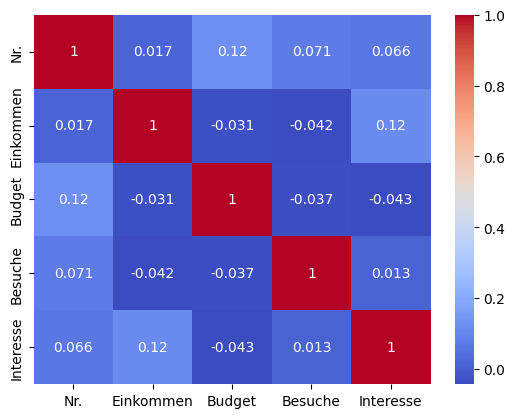

In [28]:
# Nur numerische Spalten auswählen
numerical_df = df.select_dtypes(include=[np.number])

# Korrelationsmatrix erstellen
corr = numerical_df.corr()

# Korrelationsmatrix anzeigen
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [29]:
#atomic

def is_atomic(df):
    for column in df.columns:
        
        if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
            return False
    return True

#überprüft,ob ein Element in der Spalte eine Instanz einer Liste oder eines dictionarys ist
print(is_atomic(df))

True


In [30]:
unique_values = df['MA'].unique()
unique_values

array(['Sara Hofmann', 'Oliver Gonzalez', 'Karin Storch', 'Fadil Mebarek',
       'Layla Hawi'], dtype=object)

In [31]:
for value in unique_values:
    subset = df[df['MA'] == value]
    print(subset.head(5))

   Nr.            MA Geschlecht Stadtteil   Ernaehrung  Einkommen  Budget   
0    1  Sara Hofmann          m      Nord  vegetarisch        NaN    25.0  \
1    2  Sara Hofmann          f      Nord        vegan        NaN    10.0   
2    3  Sara Hofmann          m      Nord  vegetarisch        NaN    24.0   
3    4  Sara Hofmann          m      Nord  vegetarisch        NaN    11.0   
4    5  Sara Hofmann          m      West        vegan    53120.0    27.0   

   Besuche  Interesse  
0        1          1  
1        0          1  
2        1          1  
3        2          1  
4        0          1  
     Nr.               MA Geschlecht Stadtteil   Ernaehrung  Einkommen   
121    1  Oliver Gonzalez   Weiblich       Süd        alles        0.0  \
122    2  Oliver Gonzalez   Männlich       Süd        alles        0.0   
123    3  Oliver Gonzalez   Weiblich       Süd        alles        0.0   
124    4  Oliver Gonzalez   Männlich       Süd  vegetarisch        0.0   
125    5  Oliver Gonzal

### Aufgabe 1.3 Data Fit (4 Punkte)
*Beurteilen Sie, ob die Daten Ihrer Meinung nach geeignet sind, um eine Entscheidung über ein neues Restaurant zu treffen. Welche Informationen aus den Daten sind hilfreich und welche nicht? Welche weiteren Informationen wären ggf. notwendig?*

Stadtteil
Nord    185
West    129
Süd     121
Ost      86
Name: count, dtype: int64

In [ ]:
#3. Representativeness: ob diese Erkenntnisse ein genaues Porträt einer bestimmten Situation oder Bevölkerung sind

### Aufgabe 1.4 Repräsentativität (2 Punkte)
*Welche Informationen aus dem Datensatz können verwendet werden, um einzuschätzen, wie repräsentativ der Datensatz ist? Nennen Sie zudem **mindestens eine** weitere Information, die bisher nicht in den Daten enthalten ist, aber die hilfreich wäre, um die Repräsentativität besser beurteilen zu können.*

In [ ]:
# Platz für Analysen
df['Stadtteil'].value_counts()

In [40]:
df['Ernaehrung'].value_counts()

Ernaehrung
vegetarisch    243
alles          217
vegan           53
frugan           5
Name: count, dtype: int64

## Aufgabe 2 - Datenvorverarbeitung (22 Punkte)
Die zweite Aufgabe beschäftigt sich mit der Datenvorverarbeitung.

### Aufgabe 2.1 Plausibilitätschecks (6 Punkte)

Entsprechend der Anmerkungen der Mitarbeiter:innen sind verschiedene Plausibilitätschecks der Daten denkbar. Bei diesen Checks wird geprüft, ob sich die Aussagen der Mitarbeiter:innen in den Daten wiederspiegeln.

*Führen Sie drei Plausibilitätschecks Ihrer Wahl durch. Geben Sie bei jedem Check an, auf welche Aussage Sie sich beziehen und, ob der Check fehlgeschlagen ist oder nicht.*

In [32]:
# Ihre Lösung

#Gültigkeitsprüfung: Überprüfen Sie, ob die Werte in den Spalten gültig sind.

invalid_values_stadtteil = ~df['Stadtteil'].isin(['Nord', 'Ost', 'Süd', 'West'])
print("Anzahl der ungültigen Werte in der Spalte 'Stadtteil':", invalid_values_stadtteil.sum())

invalid_values_Interesse = ~df['Interesse'].isin([0,1])
print("Anzahl der ungültigen Werte in der Spalte 'Interesse':", invalid_values_Interesse.sum())

invalid_values_besuche = ~df['Besuche'].isin([0,1,2])
print("Anzahl der ungültigen Werte in der Spalte 'Besuche':", invalid_values_besuche.sum())

Anzahl der ungültigen Werte in der Spalte 'Stadtteil': 0
Anzahl der ungültigen Werte in der Spalte 'Interesse': 0
Anzahl der ungültigen Werte in der Spalte 'Besuche': 0


### Aufgabe 2.2 Theoretische Überlegungen (2 + 2 Punkte)

Zunächst werden die Spalten `Besuche` und `Budget` betrachtet.

Die Spalte `Besuche` ist numerisch codiert. 

*Erläutern Sie (**nur beschreiben, kein Code erforderlich!**), inwiefern dies zu Problemen führen könnte. (2 Punkte)*

In der Spalte `Budget` gibt es einen Ausreißer:

,Nr.,MA,Geschlecht,Stadtteil,Ernaehrung,Einkommen,Budget,Besuche,Interesse
96,97,Sara Hofmann,m,Nord,vegetarisch,NaN,100.0,1,0


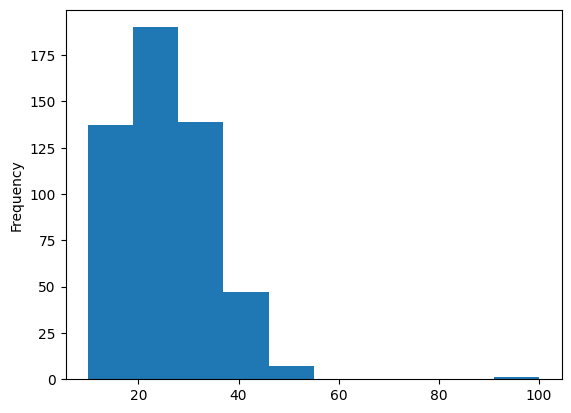

In [37]:
df['Budget'].plot.hist()
df[df['Budget'] == 100]

*Beschreiben Sie (**nur beschreiben, kein Code erforderlich!**), wie Sie mit diesem Ausreißer umgehen würden. (2 Punkte)*

### Aufgabe 2.3 Praktische Anwendung (12 Punkte)
Das Ziel der Geschwister Käfer ist es, wie oben beschrieben, herauszufinden, ob Interesse an einem neuen Restaurant vorhanden ist. Und falls Interesse da ist, sollen mithilfe der Umfrageergebnisse weitere Informationen ermittelt werden, welche Art von Restaurant am gefragtesten wäre. Für eine sinnvolle Analyse sind diverse Vorverarbeitungsschritte notwendig. 

*Führen Sie Vorverarbeitungsmaßnahmen durch, die Ihrer Meinung nach nötig sind, um die Qualität der Daten zu verbessern. Begründen Sie für jede Maßnahme Ihr Vorgehen.*


>> **Achtung**: *Da die Spalten `Besuche` und `Budget` bereits in den vorherigen Aufgaben theortetisch diskutiert wurden, sind sie deshalb aus Zeitgründen für diese Aufgabe nicht relevant. Zudem ist eine **Umbenennung** von Spalten aus Zeitgründen ebenfalls nicht notwendig!*

In [40]:
# Ihre Lösung

gender_recoding={
    'm': 'Männlich',
    'f': 'Weiblich',
    'w': 'Weiblich'
}
df['Geschlecht'] = df['Geschlecht'].map(gender_recoding).fillna(df['Geschlecht'])

In [48]:
df[df['Ernaehrung'].isna()]

,Nr.,MA,Geschlecht,Stadtteil,Ernaehrung,Einkommen,Budget,Besuche,Interesse
70,71,Sara Hofmann,Weiblich,Nord,NaN,NaN,27.0,1,1
397,75,Fadil Mebarek,Weiblich,West,NaN,NaN,15.0,0,1
441,23,Layla Hawi,Weiblich,West,NaN,0.0,14.0,0,1


In [58]:
df.groupby(['Besuche','Ernaehrung']).size()

Besuche  Ernaehrung 
0        alles          118
         frugan           1
         vegan           20
         vegetarisch    103
1        alles           53
         frugan           4
         vegan           17
         vegetarisch     83
2        alles           46
         vegan           16
         vegetarisch     57
dtype: int64

## Aufgabe 3 - Datenanalyse (16 Punkte)
In dieser Aufgabe werden Analysen auf den Daten ausgeführt.

### Aufgabe 3.1 (6 Punkte)
*Ermitteln Sie folgende Informationen:*
- Wie ist das durchschnittliche Interesse nach Ernaerhung? Bei welcher Gruppe ist das Interesse am höchsten und bei welcher am niedrigsten? (2 Punkte)
- Aus welchem Stadtteil stammen die meisten der befragten Personen?  (2 Punkte)
- Welches der beiden bereits existierenden Restaurant wurde bisher am häufigsten von Bewohner:innen der Weststadt besucht?  (2 Punkte)

*Interpretieren Sie die Aussage Ihres Codes, indem Sie die Antwort auf die jeweilige Frage in die dafür vorgesehene Raw-Zelle schreiben. Schätzen Sie dabei für jede Frage die Aussagekraft der Ergebnisse ein.*

In [76]:
average_interest_by_diet = df.groupby('Ernaehrung')['Interesse'].mean()
average_interest_by_diet


Ernaehrung
alles          0.608295
frugan         0.600000
vegan          0.735849
vegetarisch    0.720165
Name: Interesse, dtype: float64

In [79]:
max_interest_diet = average_interest_by_diet.idxmax()
max_interest_value = average_interest_by_diet[max_interest_diet]

# Identifizieren der Gruppe mit dem niedrigsten Durchschnittsinteresse
min_interest_diet = average_interest_by_diet.idxmin()
min_interest_value = average_interest_by_diet[min_interest_diet]
print("\nGruppe mit höchstem Interesse:", average_interest_by_diet.idxmax())
print("Gruppe mit niedrigstem Interesse:", average_interest_by_diet.idxmin())


Gruppe mit höchstem Interesse: vegan
Gruppe mit niedrigstem Interesse: frugan


In [85]:
# Aus welchem Stadtteil stammen die meisten der befragten Personen? 
df['Stadtteil'].value_counts().idxmax()

'Nord'

In [93]:
# Welches der beiden bereits existierenden Restaurant wurde bisher am häufigsten von Bewohner:innen der Weststadt besucht?
restaurants = {
    1: 'Palmendieb',
    2: 'Plumplori'
}
restaurants.get(df['Besuche'].value_counts()[[1,2]].idxmax())

'Palmendieb'

### Aufgabe 3.2 (4 Punkte)
Gibt es einen Unterschied in der Ernährungsweise je nach Stadtteil? 

*Beantworten Sie die Frage mithilfe von Kreisdiagrammen. Denken Sie dabei an Titel und Legende sowie die Interpretation des Diagramms.*

In [100]:
df.groupby(['Ernaehrung', 'Stadtteil']).size()

Ernaehrung   Stadtteil
alles        Nord          17
             Ost           36
             Süd           95
             West          69
frugan       West           5
vegan        Nord          22
             Ost           21
             West          10
vegetarisch  Nord         145
             Ost           29
             Süd           26
             West          43
dtype: int64

array([[<Axes: ylabel='Nord'>, <Axes: ylabel='Ost'>],
       [<Axes: ylabel='Süd'>, <Axes: ylabel='West'>]], dtype=object)

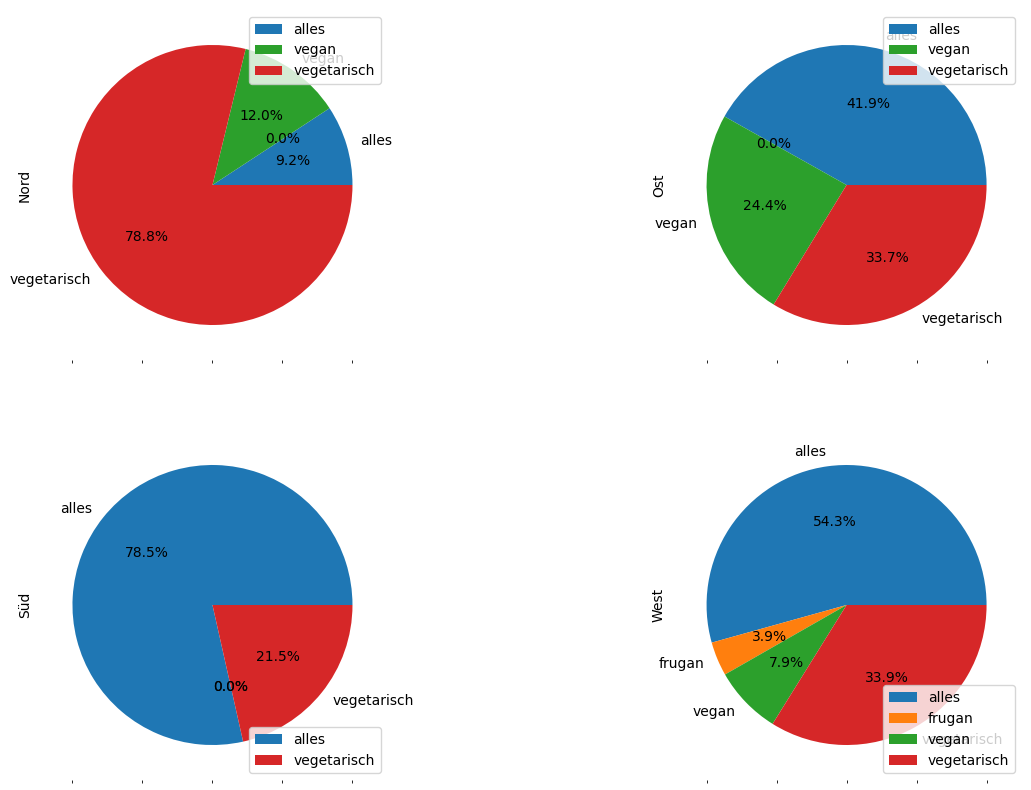

In [101]:
df.groupby(['Ernaehrung', 'Stadtteil']).size().unstack('Stadtteil').plot(kind='pie',subplots=True, figsize=(15,10), layout=(2, 2), autopct='%1.1f%%')


### Aufgabe 3.3 (4 Punkte)
Gibt es bzgl. des durchschnittlichen Interesses an einem neuen Restaurant einen großen Unterschied in Abhängigkeit der Stadtteile?

*Beantworten Sie die Frage mithilfe eines Säulendiagramms. Denken Sie dabei an Titel und Achsenbeschriftung sowie die Interpretation des Diagramms.*

<Axes: xlabel='Stadtteil'>

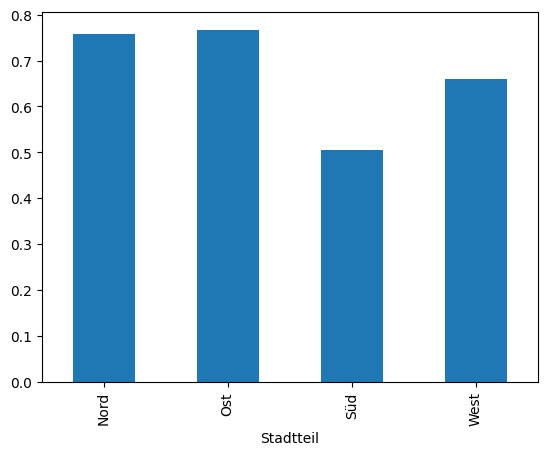

In [107]:
# Ihre Lösung
df.groupby(['Stadtteil'])['Interesse'].mean().plot(kind='bar')


### Aufgabe 3.4 (2 Punkte)
*Entsprechend Ihrer Analysen: Wenn ein neues Restaurant eröffnet werden soll, welchen Stadtteil würden Sie empfehlen und welche Hinweise würden Sie für die Ausrichtung der Speisekarte entsprechend der Ernährungsweise geben? Nehmen Sie für diese Aufgabe an, dass Sie eine Entscheidung treffen müssen und es aus Zeit- und Kostengründen keine Option ist, weitere Informationen (z.B. durch eine erneute Umfrage) einzuholen.*

## Aufgabe 4 - Big Data Analysis (15 Punkte)
In diesem Aufgabenbereich geht es um Hadoop und Spark.

### Aufgabe 4.1 Hadoop Map Reduce vs. Spark (2 + 1 Punkte)
*Beschreiben Sie die Unterschiede zwischen der Verarbeitung der Tasks von Hadoop MapReduce und von Spark. (2 Punkte)*

*Welche Vorteile ergeben sich daraus bei der Arbeit mit Spark? (1 Punkt)*

### Aufgabe 4.2 Eigenschaften RDDs (8 Punkte)
Nennen Sie vier der fünf wichtigsten Eigenschaften von RDDs. Beschreiben Sie für jede Eigenschaft mit einem kurzen Satz, warum sie von Bedeutung ist.

### Aufgabe 4.3 Ressourcenvebrauch (4 Punkte)
Gegeben sei folgender Auszug aus der Datei `spark-defaults.conf`:

```
spark.executor.instances 3
spark.executor.memory 1G
spark.executor.cores 2
spark.executor.memoryOverhead 512M

spark.yarn.am.cores 1
spark.yarn.am.memory 2G
spark.yarn.am.memoryOverhead 512M

spark.dynamicAllocation.enabled false
```

Ein pyspark-Shell wird mit folgendem Aufruf gestartet:
`pyspark --master yarn`

Gehen Sie davon aus, dass im Cluster genügend freie Ressourcen zur Verfügung stehen, um die Anfragen des Application Masters zu erfüllen.

*Berechnen Sie den Ressourcen-Verbrauch (Memory und Cores) der Spark-Anwendung. Geben Sie dabei Ihren Rechenweg an.*

## Aufgabe 5 - Modellierung, NoSQL (25 Punkte)

### Aufgabe 5.1 (2 Punkte)

Beschreiben Sie Anwendungseigenschaften bzw. Charakteristika, die eher für die Verwendung eines dokumentorientierten bzw. spaltenorientierten Datenbanksystems sprechen.

### Aufgabe 5.2 (2 Punkte)

Embedded vs. referentielle Modellierung bei dokumentorientierten Datenbanksystemen wie MongoDB.

Sie möchten aus Eigenschaften der Anwendung bzw. der Abfragen schlussfolgern, welche Art der Modellierung (embedded oder referenziell) Sie wählen sollen. Geben Sie Modellierungsrichtlinien bzw. Anwendungscharakteristika an, die einen starken Einfluss auf die Auswahl der Modellierung haben.

### Aufgabe 5.3 (21 Punkte)

In einem dokumentenorientierten NoSQL-Datenbanksystem sollen Kunden, Produkte und Bestellungen gespeichert werden. Dabei können pro Bestellung **mehrere Produkte in unterschiedlicher Anzahl** bestellt werden. Außerdem können Kunden Reviews zu den bestellten Produkten abgeben.


Geplante Abfragen:

- Es können neue Produkte hinzugefügt werden.
- Die Preise der Produkte können verändert werden.
- Produkte können entfernt werden.
- Neue Kunde können angelegt werden.
- Es kann nach Produkten gesucht werden. Zu den Produkten werden neben den Produktinformationen ebenfalls die 10 neuesten Reviews angezeigt.
- Ein Kunde kann eine neue Bestellung aufgeben.
- Ein Kunde kann Reviews über gekaufte Produkte schreiben.
- Ein Kunde kann sich seine  Bestellungen innerhalb eines bestimmten Zeitraums anzeigen lassen. Das Gleiche gilt für Reviews.


1. Erstellen Sie zunächst ein plattformunabhängiges (konzeptionelles) Modell (dieses Modell enthält noch keine Fremdschlüssel, Einbettungen und Datentypen). Modellieren Sie außerdem folgende Attribute: Kunden haben einen Namen und Vornamen. Bestellungen haben ein Datum. Produkte haben einen Titel, einen Preis und eine Beschreibung. Reviews enthalten den Text und ein Datum.
2. Skizzieren Sie anschließend ein geeignetes Datenmodell für die Speicherung in einem dokumentenorientierten Datenbanksystem. Begründen Sie ihre Entscheidungen für Referenzierungen, Einbettungen und redundante Speicherung bzw. Einbettung. Heben Sie redundante- und Fremdschlüssel-Attribute farblich hervor.

[example here](https://i.stack.imgur.com/mNgza.png)

In [ ]:
%%plantuml
@startuml

hide circle
show members
show fields

skinparam classAttributeIconSize 0

class "Datenbank" as db {
    + void change_price(new_price: float)
    + add_product(p : Product)
    + remove_product(p : Product)
    + Product[] look_up_products(search_text: text)
    + add_kunde(k : Kunde)
}

class "Produkt" as p {
    * <color:blue>**product_id: int<<PK>>**</color>
    * title: text
    * description: text
    * price: float
    * void change_price(new_price: float)
}

class "Bestellung" as b {
    * <color:blue>**order_id: int<<PK>>**</color>
    * <color:Tomato>**product_id: int<<FK>>**</color>
    * <color:Tomato>**costumer_id: int<<FK>>**</color>
    * order_date: date
}

class "Kunde" as k {
    * <color:blue>**id: int<<PK>>**</color>
    * Name: text
    * forname: text
    * put_order(p Produkt)
    * write_review(p : Produkt, r : Review)
    * see_orders()
    * see_reviews()
}

class "Review" as r {
    * review_text: text
    * review_date: date
}

d "1" -- "0..*" e : has >
d "1" -- "0..*" p : has >

@enduml

## Aufgabe 6 - Technologien für Big Data (5 Punkte)

### Aufgabe 6.1 (2 Punkte)
Warum eignen sich spaltenorientierte Datenbanksysteme sehr gut für analytische Anwendung wie beispielsweise Data Warehouses?

### Aufgabe 6.2 (1 Punkt)
In einer Tabelle `Verkauf` mit Verkaufsdaten ist jeder Datensatz (jede Zeile) im Mittel 100 Bytes lang. Das Attribut `Filiale` belegt 5 Bytes. Wieviel Prozent der Daten müssen bei einer spaltenorientierten Speicherung im Vergleich zu einer zeilenorientierten Speicherung gelesen werden, wenn die folgende SQL-Query ausgeführt wird?

`SELECT Filiale, COUNT(*) FROM Verkauf GROUP BY Filiale;`

### Aufgabe 6.3 (2 Punkte)
Angenommen, Sie verwenden in einem Cluster mit *n* Servern für die Zuordnung der Daten mit Key *k* die Hashfunktion *k mod n*. Welche Probleme würden in diesem Szenario auftreten?